In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read input from JSON records.

In [2]:
lines = []
for part in ("00000", "00001"):
  with open("../output/2017-01-03_13.57.34/part-%s" % part) as f:
    lines += f.readlines()

print(lines[0])

{"Id":1,"PostTypeId":1,"Body":"What does \"backprop\" mean? I've Googled it, but it's showing backpropagation.\n\nIs the \"backprop\" term basically the same as \"backpropagation\" or does it have a different meaning?\n","Score":5,"Tags":["neural-networks","definitions"]}



Create a pandas `DataFrame`

In [4]:
import pandas as pd

df = pd.read_json('[%s]' % ','.join(lines))

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 1278
Data columns (total 5 columns):
Body          1279 non-null object
Id            1279 non-null int64
PostTypeId    1279 non-null int64
Score         1279 non-null int64
Tags          1279 non-null object
dtypes: int64(3), object(2)
memory usage: 60.0+ KB
None


,Body,Id,PostTypeId,Score,Tags
0,"What does ""backprop"" mean? I've Googled it, bu...",1,1,5,"[neural-networks, definitions]"
1,Does increasing the noise in data help to impr...,2,1,7,[generalization]
2,"""Backprop"" is the same as ""backpropagation"": i...",3,2,10,[]
3,"When you're writing your algorithm, how do you...",4,1,16,"[deep-network, layers, neurons]"
4,I have a LEGO Mindstorms EV3 and I'm wondering...,5,1,0,[mindstorms]


Create new features

In [5]:
df["has_qmark"] = df.Body.apply(lambda s: "?" in s)
df["num_qmarks"] = df.Body.apply(lambda s: s.count("?"))
df["body_length"] = df.Body.apply(lambda s: len(s))

In [6]:
df

,Body,Id,PostTypeId,Score,Tags,has_qmark,num_qmarks,body_length
0,"What does ""backprop"" mean? I've Googled it, bu...",1,1,5,"[neural-networks, definitions]",True,2,179
1,Does increasing the noise in data help to impr...,2,1,7,[generalization],True,3,213
2,"""Backprop"" is the same as ""backpropagation"": i...",3,2,10,[],False,0,117
3,"When you're writing your algorithm, how do you...",4,1,16,"[deep-network, layers, neurons]",True,2,184
4,I have a LEGO Mindstorms EV3 and I'm wondering...,5,1,0,[mindstorms],True,2,333
5,The intelligent agent definition of intelligen...,6,1,3,"[intelligent-agent, philosophy]",True,1,376
6,This quote by Stephen Hawking has been in head...,7,1,8,[intelligent-agent],True,5,418
7,You can use which can be used to program Lego...,8,2,2,[],False,0,93
8,"Noise in the data, to a reasonable amount, may...",9,2,6,[],False,0,750
9,I'm new to A.I. and I'd like to know in simple...,10,1,13,"[deep-network, fuzzy-logic]",True,2,126


Filter for `PostTypeId == 1 or PostTypeId == 2`

In [7]:
df = df.loc[df.PostTypeId.apply(lambda x: x in [1, 2]), :]
df = df.reset_index(drop=True)
df.head()

,Body,Id,PostTypeId,Score,Tags,has_qmark,num_qmarks,body_length
0,"What does ""backprop"" mean? I've Googled it, bu...",1,1,5,"[neural-networks, definitions]",True,2,179
1,Does increasing the noise in data help to impr...,2,1,7,[generalization],True,3,213
2,"""Backprop"" is the same as ""backpropagation"": i...",3,2,10,[],False,0,117
3,"When you're writing your algorithm, how do you...",4,1,16,"[deep-network, layers, neurons]",True,2,184
4,I have a LEGO Mindstorms EV3 and I'm wondering...,5,1,0,[mindstorms],True,2,333


In [8]:
n_questions = np.sum(df.PostTypeId == 1)
n_answers = np.sum(df.PostTypeId == 2)
print("No. questions {0} / No. answers {1}".format(n_questions, n_answers))

No. questions 421 / No. answers 749


Are any relationships apparent in the raw data and the obvious features?

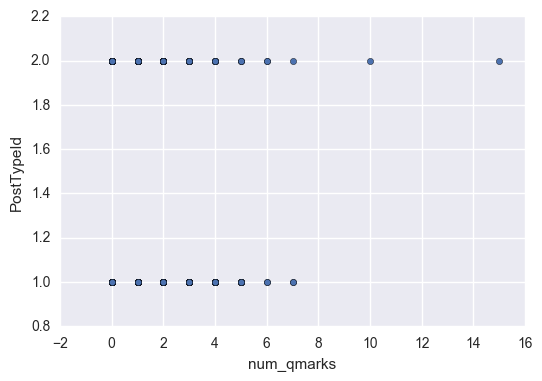

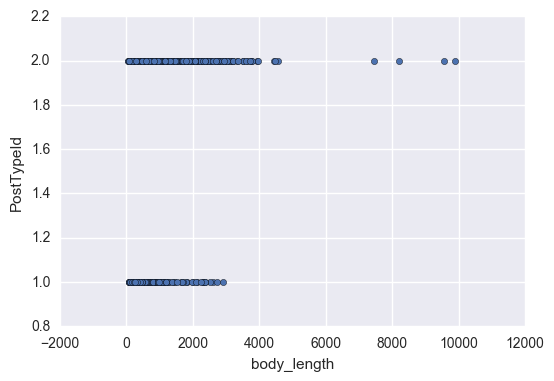

In [9]:
df.plot.scatter(x="num_qmarks",y="PostTypeId")
df.plot.scatter(x="body_length",y="PostTypeId")

## Problem:
Can `PostTypeId` be predicted from the post body? Here, we try the linear `RidgeClassifier` and the nonlinear `RandomForestClassifier` and compare the accuracy in the training set to the accuracy in the test set.

From the results, we see that the `RandomForestClassifier` is more accurate than the linear model, but is actually overfitting the data. The overfitting is likely to improve with more training examples, so let's choose the `RF` classifier.

In [10]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

X = df.loc[:, ['num_qmarks', 'body_length']]
y = df.loc[:, 'PostTypeId']

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=42)

classifiers = [("Ridge", RidgeClassifier()), ("RandomForest", RandomForestClassifier())]

for name, classifier in classifiers:
  classifier.fit(X_train, y_train)
  print(name + " " + "-"*(60 - len(name)))
  print("R2_train: {0}, R2_test: {1}".format(classifier.score(X_train, y_train), classifier.score(X_test, y_test)))
  print()

Ridge -------------------------------------------------------
R2_train: 0.8473748473748474, R2_test: 0.8632478632478633

RandomForest ------------------------------------------------
R2_train: 0.9804639804639804, R2_test: 0.8632478632478633



## Feature extraction

Use sklearns `Tranformer` class to extract features from the original `DataFrame`.

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

class FSTransformer(BaseEstimator, TransformerMixin):
  """
  Returns the different feature names
  """
  def __init__(self, features):
    self.features = features
    pass

  def fit(self, X, y):
    return self
  
  def transform(self, df):
    return df[self.features].as_matrix()

  
class CountVecTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.vectorizer = CountVectorizer(binary=False)
    pass
  
  def fit(self, df, y=None):
    self.vectorizer.fit(df.Body)
    return self
  
  def transform(self, df):
    return self.vectorizer.transform(df.Body).todense()
  


In [12]:
df.head()

,Body,Id,PostTypeId,Score,Tags,has_qmark,num_qmarks,body_length
0,"What does ""backprop"" mean? I've Googled it, bu...",1,1,5,"[neural-networks, definitions]",True,2,179
1,Does increasing the noise in data help to impr...,2,1,7,[generalization],True,3,213
2,"""Backprop"" is the same as ""backpropagation"": i...",3,2,10,[],False,0,117
3,"When you're writing your algorithm, how do you...",4,1,16,"[deep-network, layers, neurons]",True,2,184
4,I have a LEGO Mindstorms EV3 and I'm wondering...,5,1,0,[mindstorms],True,2,333


In [13]:
fst = FSTransformer(["has_qmark"])
fst.transform(df)

array([[ True],
       [ True],
       [False],
       ..., 
       [ True],
       [ True],
       [ True]], dtype=bool)

In [14]:
CountVecTransformer().fit_transform(df)

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Let's use the word frequency vectors in combination with the *obvious* features we created previously to try to predict `PostTypeId`.

In [15]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import f1_score

model_pipe = Pipeline([
    ("features", 
      FeatureUnion([
        ("derived", FSTransformer(["has_qmark", "num_qmarks", "body_length"])),
        ("count_vec", CountVecTransformer())
      ])
     ),
    ("clf", RandomForestClassifier())
  ])

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

X = df
y = df.PostTypeId

for train_index, test_index in sss.split(X.as_matrix(), y.as_matrix()):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  model_pipe.fit(X_train, y_train)
  r2_train = model_pipe.score(X_train, y_train)
  r2_test = model_pipe.score(X_test, y_test)
  y_pred = model_pipe.predict(X_test)
  f1 = f1_score(y_test, y_pred)
  print("R2_train: {0} R2_test: {1} f1: {2}".format(r2_train, r2_test, f1))
  

R2_train: 0.9987789987789988 R2_test: 0.8717948717948718 f1: 0.8132780082987553
R2_train: 0.9975579975579976 R2_test: 0.8774928774928775 f1: 0.8154506437768241
R2_train: 0.9975579975579976 R2_test: 0.8746438746438746 f1: 0.8035714285714286
R2_train: 0.9987789987789988 R2_test: 0.8433048433048433 f1: 0.7717842323651453
R2_train: 1.0 R2_test: 0.8433048433048433 f1: 0.7736625514403291


Since we're overfitting, we can try reducing the total number of features. One approach to this is to perform the $\chi^2$ statistical test of independence on each feature with respect to the label (`PostTypeId`) and remove the features that are most independent of the label. Here, we put `SelectKBest` into the model pipeline and keep only the 10 most dependent features.

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

model_pipe = Pipeline([
    ("features", 
      FeatureUnion([
        ("derived", FSTransformer(["has_qmark", "num_qmarks", "body_length"])),
        ("count_vec", CountVecTransformer())
      ])
     ),
    ("best_features", SelectKBest(chi2, k=10)),
    ("clf", RandomForestClassifier())
  ])

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

X = df
y = df.PostTypeId

for train_index, test_index in sss.split(X.as_matrix(), y.as_matrix()):
  X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  
  model_pipe.fit(X_train, y_train)
  r2_train = model_pipe.score(X_train, y_train)
  r2_test = model_pipe.score(X_test, y_test)
  y_pred = model_pipe.predict(X_test)
  f1 = f1_score(y_test, y_pred)
  print("R2_train: {0} R2_test: {1} f1: {2}".format(r2_train, r2_test, f1))

R2_train: 0.9951159951159951 R2_test: 0.8945868945868946 f1: 0.8525896414342629
R2_train: 0.989010989010989 R2_test: 0.8888888888888888 f1: 0.8421052631578947
R2_train: 0.9914529914529915 R2_test: 0.8974358974358975 f1: 0.859375
R2_train: 0.9951159951159951 R2_test: 0.886039886039886 f1: 0.8387096774193549
R2_train: 0.9951159951159951 R2_test: 0.8974358974358975 f1: 0.8625954198473282


So, the generalization the model improved, but what is the right number of features to keep? For this, we can use model cross-validation. The class `GridSearchCV` allows us to vary a hyperparameter of the model and compute the model score for each candidate parameter (or set of parameters).

/Users/joshuaarnold/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,best_features__k,mean_validation_score
0,3,0.799145
1,9,0.887179
2,27,0.903419
3,81,0.907692
4,243,0.901709
5,729,0.889744


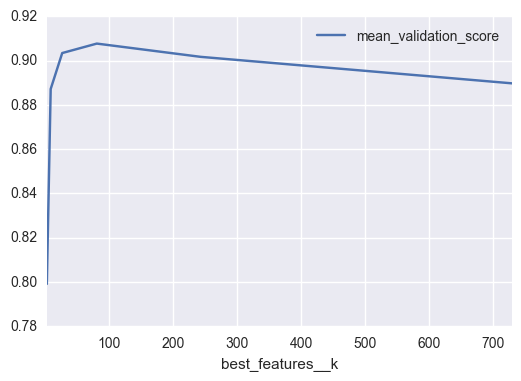

In [18]:
from sklearn.model_selection import GridSearchCV

modelCV = GridSearchCV(model_pipe, {"best_features__k":[3 ** i for i in range(1,7)]})
modelCV.fit(X,y)

cv_accuracy = pd.DataFrame([{**score.parameters, **{"mean_validation_score": score.mean_validation_score}} 
             for score in modelCV.grid_scores_])
cv_accuracy.plot(x="best_features__k", y="mean_validation_score")
cv_accuracy

We can refine our range of hyperparameters to hone in on the best number.

/Users/joshuaarnold/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


,best_features__k,mean_validation_score
0,80,0.894872
1,90,0.903419
2,100,0.899145
3,110,0.902564


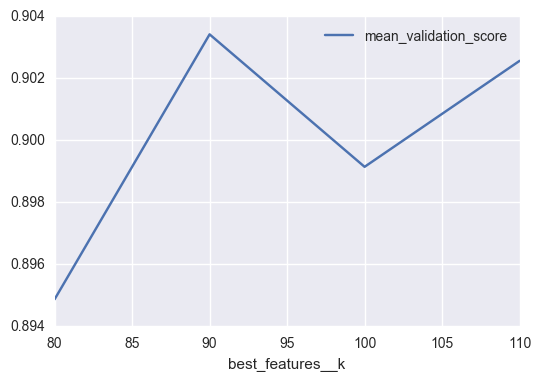

In [19]:
modelCV = GridSearchCV(model_pipe, {"best_features__k":list(range(80,120,10))})
modelCV.fit(X,y)

cv_accuracy = pd.DataFrame([{**score.parameters, **{"mean_validation_score": score.mean_validation_score}} 
             for score in modelCV.grid_scores_])
cv_accuracy.plot(x="best_features__k", y="mean_validation_score")
cv_accuracy

Finally, we can inspect the confusion matrix to determine the types of errors encounter

 True Positive | False Positive   
------|------
   False Negative  | True Negative 

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, modelCV.predict(X_test))
cm = cm / cm.sum(axis=0)
print(cm)

[[ 0.98425197  0.00446429]
 [ 0.01574803  0.99553571]]


In [23]:
cm = confusion_matrix(y_test, modelCV.predict(X_test))
cm

array([[125,   1],
       [  2, 223]])

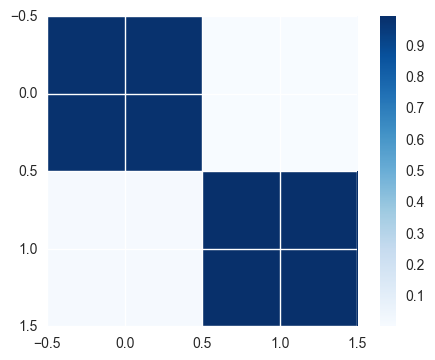

In [25]:
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.colorbar()